<a href="https://colab.research.google.com/github/OwenHuels/data-science/blob/main/Owen_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, elpd_loo does not mean anything if we only have one model. It is only relevant in comparing two similar models to eachother to see how they performed in terms of predictive power. The more positive the elpd_loo for one model in comparison to another, the more comparatively effective the model is.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when your model aligns almost perfectly with the given data set. This causes the model to have a difficult time predicting future data accurately because it has become too tuned to the data set we originally gave it. Overfitting can happen when you use too many variables in your model while attempting to predict another variable, or if the original data set you give the model is too small or unrepresentative of the real distribution of data.

**Task3**:

How do we mitigate overfitting?

We mitigate overfitting by making sure not to select too many input variables for our models. If two models have relatively close elpd_loo's (within eachother's variance), we choose the one with less variables. The fit to the sample data will be relatively similar for both models, but the one with less variables is likely better able to adapt to a predict new data. The regulizing paramters that are autoselected by bambi also do a pretty good job of mitigating overfitting because they filter out variables to a good amount to make the ones that aren't important not very impactful. Selecting good priors yourself can do a lot to mitigate overfitting as well.

**Task4**:

How do we mitigate underfitting?

Underfitting is caused when the model doesn't have enough predictors in order to be able to fit the sample data effectively. There are likely more variables at play than the ones we gave the model, so it has a hard time predicting well with just one. We can mitigate this by providing all of the predictor that we think have a strong relationship with the target variable, then adding or subtracting variables from there. Models with low elpd_loo's are typicall indicative of underfitting, so we avoid selecting these models to prevent it.

**Task5**:

Why would we want more than one predictor in a model?

Having more than one predictor in a model is valuable because it allows us to predict more complex variables that are dependent on many different factors. In the real world, it's very rare to find an instance of something being directly dependent on only one other thing. There's always a more complex framework behind what is happening, and having more predictors allows us to analyze this complexity. The predictive power of most models is much improved when you incorperate more predictor to help the model out.

**Task6**:

Can we have too many predictors? How would we now?

We can definitely have too many predictors. We know we have too many predictors when the model begins overfitting; it is unable to adapt to and predict new data outside of the sample set. It's also just generally unfavorable to have a large amount of predictors, as it makes the model difficult to understand for new viewers.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process by which, when given a data set with many possible predictors, you choose the predictors that allow you to effectively predict your chosen target variable without over or underfitting. This involves choosing how many variables you want, and which variables they are. We do in two main ways: DAGs and elpd_loo. DAGs are diagrams that draw out connections between variables, allowing us to see which variables may be good predictors for other ones. We can make a DAG and then run models with the variables that we think are most strongly correlated with the target variable and analyze from there using elpd_loo. Alternatively, we can start by running a bunch of models with different variables and checking their elpd_loo, then choosing the one with the best elpd_loo and not a massive amount of variables (to avoid overfitting).

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

Both using the categorical as a hierarchy and adding the interaction between the categorical and the other variable allows for the different categories to have different slopes. This is valuable for models like the NBA one where FT% correlates with FG% in very different ways depending on position. All 3 models are similar in that they create multiple lines in the linear model, each one corresponding to a different category from the categorical variable. The interaction and hierarchical methods usually have similar results because they encode the same information: there is a difference in what the correlation between the other two variables is based on the 3rd variable. The standard model is less complex than the other two, so it is generally easier to run and understand than the other two, at the cost of that lost complexity usually hurting the predictive power.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

It's impossible to visualize the entire model in one graph. If we really wanted to be able to visualize the model, we would have to create many different graphs, each graph having two variables on the axes and then a third variable that changes overall between graphs (this method can be seen with the bikes data, where we have each graph represent a different hour of the day). This is unviable once we get beyond 3 variables though, especially if we don't have any categorical variables because we need a discrete number of graphs. Rather than trying to visualize multiple linear regression models, it's generally better to compare elpd_loo's to find the best model.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [26]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-g759rina
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-g759rina
  Resolved https://github.com/pydata/xarray.git to commit 2c8b6e6942e537b24cc09adc5204d6100d2843aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [27]:
import xarray as xr

In [28]:
!pip install bambi

In [29]:
import bambi as bmb

In [30]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [31]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [32]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [33]:
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


In [34]:
model_nba_standard = bmb.Model("FGp ~ FTp + Pos", bb)
idata_nba_standard = model_nba_standard.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [35]:
model_nba_hierarchy = bmb.Model("FGp ~ (FTp|Pos)", bb)
idata_nba_hierarchy = model_nba_hierarchy.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


In [36]:
model_nba_interact_ftpos = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", bb)
idata_nba_interact_ftpos = model_nba_interact_ftpos.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [37]:
model_nba_interact_ftpos3p = bmb.Model("'FGp' ~ 'FTp' + 'Pos' + '3PA' + 'FTp':'Pos' + 'FTp':'3PA' + 'Pos':'3PA'", bb)
idata_nba_interact_ftpos3p = model_nba_interact_ftpos3p.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [38]:
model_nba_interact_pos3p = bmb.Model("'FGp' ~ 'FTp' + 'Pos' + '3PA' + 'Pos':'3PA'", bb)
idata_nba_interact_pos3p = model_nba_interact_pos3p.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [39]:
cmp_df_bmb = az.compare( {"Standard (FT% and Pos)":idata_nba_standard,"Pos Hierarchical on FT%":idata_nba_hierarchy,
                          "Interact FT% and Pos (+3PA)":idata_nba_interact_ftpos,"Interact FT%, Pos, and 3PA":idata_nba_interact_ftpos3p,
                          "Interact Pos and 3PA (+FT%)":idata_nba_interact_pos3p}  )
cmp_df_bmb

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Interact Pos and 3PA (+FT%),0,529.901325,12.674206,0.000000,5.875956e-01,15.850449,0.000000,False,log
"Interact FT%, Pos, and 3PA",1,528.849473,19.254211,1.051852,4.124044e-01,15.097211,3.621909,False,log
Interact FT% and Pos (+3PA),2,509.227461,13.933233,20.673863,1.529063e-15,16.785964,7.661132,False,log
Pos Hierarchical on FT%,3,508.260756,13.800607,21.640568,4.572767e-15,17.004632,7.083318,False,log
Standard (FT% and Pos),4,507.251669,8.443210,22.649655,0.000000e+00,16.111120,6.831748,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

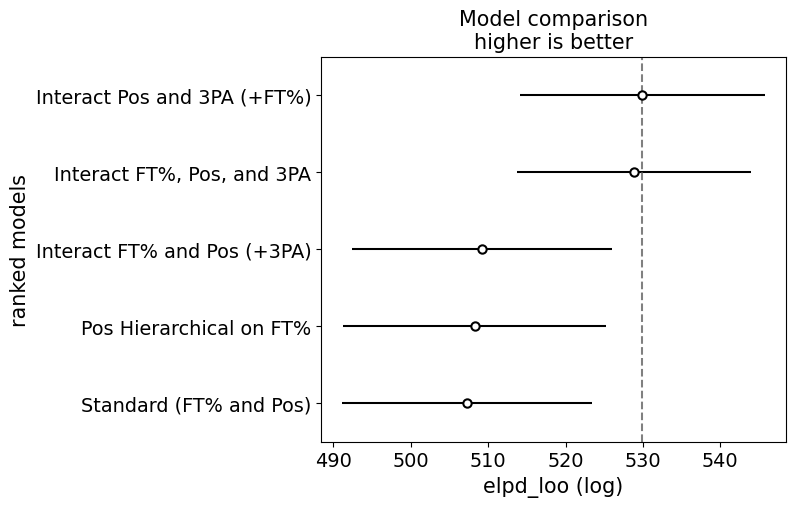

In [40]:
az.plot_compare(cmp_df_bmb)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

I believe that the interaction model with free throw percentage, position, three point attempts, and an interaction between position and three point attempts is the best model.

First of all, this model has the most positive elpd_loo out of all the models, so that's a good sign to choose it. This is good because we want to avoid underfitting, so picking a high elpd_loo is desirable.

Another reason is that out of this model and the other one that is relatively close in elpd_loo, being the interaction model with interactions between all three variables, this model has less variables. This is optimal because it helps to avoid overfitting.